In [1]:
import torch 
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [2]:
raw_data="""There is no better teacher in life than failure. Failure brings the opportunity to learn things better.
It helps us in learning from our mistakes. Failures make us rethink and reconsider to find new ways and strategies to achieve our goals. 
Failure helps us in gaining deeper experience and better knowledge that widens our ways of growth. It plants deep value within us so that 
we can better understand life and the world around us. Every ‘failed attempt’ simply becomes a new learning experience to fine-tune our efforts. 
Failure is, in fact, the most valuable experience that teaches us new things. Failures helps us understand the meaning of hard work. """
raw_data=raw_data.split()
#context word window size
context_words=2 #2 to the left and 2 to the right

#no of hidden layers or length of embeddings(since both are equivalent)
n=100
vocab=set(raw_data)
vocab_size=len(vocab)

dict_word_to_ix = {word:ix for ix, word in enumerate(vocab)}
dict_ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [3]:
context_data=[]
target_labels=[]
for i in range(2, len(raw_data) - 2):
  #storing the context words index
  context_vec=[dict_word_to_ix[raw_data[i - 2]],dict_word_to_ix[raw_data[i-1]],dict_word_to_ix[raw_data[i+1]],dict_word_to_ix[raw_data[i+2]]]
  context_vec=torch.Tensor(context_vec)
  context_vec=context_vec.long()
  #Converting the context word index to one-hot vector using nn.functional.one_hot
  context=F.one_hot(context_vec,vocab_size)
  context=torch.sum(context,dim=0,keepdim=True)
  #Working on target 
  target=dict_word_to_ix[raw_data[i]]
  target=torch.tensor(target)
  target_labels.append(target)
  target=F.one_hot(target,num_classes=vocab_size)
  context_data.append((context,target))

# print(context_data)
# context=context_data
# print(context)

In [4]:
class CBOW(nn.Module):
    def __init__(self,vocab_size,em_size):
      super(CBOW,self).__init__()

      self.linear1=nn.Linear(vocab_size,em_size,bias=False)
      self.act1=nn.ReLU()
      self.linear2=nn.Linear(em_size,em_size)
      self.act2=nn.ReLU()
      self.linear3=nn.Linear(em_size,vocab_size)
      self.act3=nn.Softmax(dim=-1)


    def forward(self,input):
      out=self.linear1(input)
      out=self.act1(out)
      out=self.linear2(out)
      out=self.act2(out)
      out=self.linear3(out)
      out=self.act3(out)

      return out

In [5]:
model=CBOW(vocab_size,n)
# criterion=nn.NLLLoss()
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.3)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
loss_func = []
accuracy = []

for i in range(0,700):
  loss = 0
  acc = 0
  for k, (context, target) in enumerate(context_data):
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == target_labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)
  if(i%20 == 0):
    print(loss)
    print(acc/n*100)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(451.8500, grad_fn=<AddBackward0>)
2.0
tensor(451.5211, grad_fn=<AddBackward0>)
6.0
tensor(445.1399, grad_fn=<AddBackward0>)
11.0
tensor(438.6715, grad_fn=<AddBackward0>)
14.000000000000002
tensor(425.8310, grad_fn=<AddBackward0>)
28.999999999999996
tensor(419.7573, grad_fn=<AddBackward0>)
35.0
tensor(412.4247, grad_fn=<AddBackward0>)
41.0
tensor(409.5650, grad_fn=<AddBackward0>)
44.0
tensor(404.9312, grad_fn=<AddBackward0>)
49.0
tensor(397.4367, grad_fn=<AddBackward0>)
56.99999999999999
tensor(387.6078, grad_fn=<AddBackward0>)
67.0
tensor(394.2205, grad_fn=<AddBackward0>)
60.0
tensor(399.6051, grad_fn=<AddBackward0>)
55.00000000000001
tensor(389.2564, grad_fn=<AddBackward0>)
66.0
tensor(386.1806, grad_fn=<AddBackward0>)
68.0
tensor(386.1504, grad_fn=<AddBackward0>)
68.0
tensor(386.1151, grad_fn=<AddBackward0>)
68.0
tensor(385.1664, grad_fn=<AddBackward0>)
69.0
tensor(385.1557, grad_fn=<AddBackward0>)
69.0
tensor(385.1338, grad_fn=<AddBackward0>)
69.0
tensor(384.1772, grad_fn=<Ad

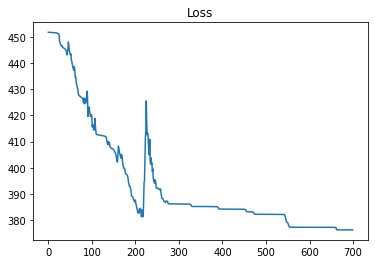

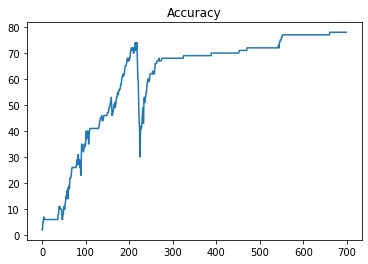

In [7]:
import matplotlib.pyplot as plt
plt.plot(loss_func)
# plt.plot(loss_list)
plt.title("Loss")
plt.show()
plt.plot(accuracy)
# plt.plot(accuracy_list)
plt.title("Accuracy")
plt.show()

In [8]:
#Testing
context = ["Failure","brings","opportunity", "to"]
context_vector=[]
for c in context:
  print(c)
  context_vector.append(dict_word_to_ix[c])

context_vec=torch.Tensor(context_vector)
context_vec=context_vec.long()
context_vec=F.one_hot(context_vec,vocab_size)
context_vec=torch.sum(context_vec,dim=0,keepdim=True)
op=model(context_vec.float())
print(op)
l, predicted = torch.max(op.data , 1)
print(l)
print(predicted)
# print(int(predicted))
print(dict_ix_to_word[int(predicted)])
# print(context_vector)

Failure
brings
opportunity
to
tensor([[3.1089e-13, 1.2329e-14, 1.4074e-13, 2.5701e-14, 4.4567e-15, 1.2326e-13,
         4.5307e-19, 5.7911e-15, 1.0388e-09, 1.2783e-08, 6.0099e-14, 5.9254e-12,
         3.1778e-14, 8.9168e-14, 1.0420e-17, 2.9881e-15, 1.6422e-14, 2.5199e-10,
         8.9680e-11, 1.8023e-15, 2.9902e-08, 1.7313e-15, 3.3500e-15, 6.3260e-16,
         9.0982e-16, 2.8595e-15, 7.8445e-14, 1.7435e-15, 2.7891e-14, 1.4619e-16,
         6.9486e-11, 5.1368e-21, 2.2255e-11, 5.1137e-14, 8.4866e-15, 1.6219e-12,
         5.5488e-15, 4.1260e-11, 6.6457e-15, 1.6815e-14, 1.6272e-11, 2.5504e-11,
         4.7621e-14, 4.5170e-20, 9.5228e-11, 4.3048e-15, 2.8794e-17, 7.6408e-14,
         1.6700e-15, 1.1912e-14, 5.8319e-15, 1.7474e-14, 3.1172e-15, 3.6843e-18,
         6.4217e-15, 8.3246e-16, 2.9236e-17, 1.6616e-12, 3.7689e-19, 1.0967e-13,
         3.4600e-15, 1.8326e-17, 1.6681e-07, 8.9499e-15, 7.0709e-15, 6.3272e-09,
         1.0000e+00, 1.1365e-14, 8.5798e-15, 2.3812e-09, 1.3136e-15]],
       g

In [9]:
print(dict_word_to_ix)

{'helps': 0, 'world': 1, 'learn': 2, 'strategies': 3, 'so': 4, 'things': 5, 'new': 6, 'rethink': 7, 'brings': 8, 'opportunity': 9, 'of': 10, 'from': 11, 'gaining': 12, 'life': 13, 'we': 14, 'around': 15, 'can': 16, 'fine-tune': 17, 'teacher': 18, 'deep': 19, 'than': 20, 'efforts.': 21, 'is': 22, 'widens': 23, 'attempt’': 24, 'better': 25, 'most': 26, 'things.': 27, 'knowledge': 28, 'understand': 29, 'valuable': 30, 'Failure': 31, 'our': 32, 'that': 33, 'reconsider': 34, 'and': 35, 'better.': 36, 'within': 37, 'goals.': 38, 'is,': 39, 'fact,': 40, 'teaches': 41, 'us.': 42, 'us': 43, 'meaning': 44, 'hard': 45, 'in': 46, 'growth.': 47, 'a': 48, 'simply': 49, 'work.': 50, 'failure.': 51, 'There': 52, 'to': 53, 'deeper': 54, 'becomes': 55, 'value': 56, 'mistakes.': 57, 'no': 58, 'Failures': 59, 'find': 60, 'It': 61, 'learning': 62, 'plants': 63, '‘failed': 64, 'ways': 65, 'the': 66, 'achieve': 67, 'Every': 68, 'make': 69, 'experience': 70}


In [27]:
print(dict_word_to_ix)
context1=np.zeros(vocab_size)
context1=np.array(context1)
context1=torch.tensor(context1)
context1[dict_word_to_ix['Failures']]=1
context2=np.zeros(vocab_size)
context2=np.array(context2)
context2=torch.tensor(context2)
context2[dict_word_to_ix['opportunity']]=1
a=model(context1.float())
b=model(context2.float())
a=torch.tensor(a)
b=torch.tensor(b)
ang=np.arccos(np.clip(np.dot(a, b),-1.0,1.0))
deg=ang*180/(np.pi)

{'helps': 0, 'world': 1, 'learn': 2, 'strategies': 3, 'so': 4, 'things': 5, 'new': 6, 'rethink': 7, 'brings': 8, 'opportunity': 9, 'of': 10, 'from': 11, 'gaining': 12, 'life': 13, 'we': 14, 'around': 15, 'can': 16, 'fine-tune': 17, 'teacher': 18, 'deep': 19, 'than': 20, 'efforts.': 21, 'is': 22, 'widens': 23, 'attempt’': 24, 'better': 25, 'most': 26, 'things.': 27, 'knowledge': 28, 'understand': 29, 'valuable': 30, 'Failure': 31, 'our': 32, 'that': 33, 'reconsider': 34, 'and': 35, 'better.': 36, 'within': 37, 'goals.': 38, 'is,': 39, 'fact,': 40, 'teaches': 41, 'us.': 42, 'us': 43, 'meaning': 44, 'hard': 45, 'in': 46, 'growth.': 47, 'a': 48, 'simply': 49, 'work.': 50, 'failure.': 51, 'There': 52, 'to': 53, 'deeper': 54, 'becomes': 55, 'value': 56, 'mistakes.': 57, 'no': 58, 'Failures': 59, 'find': 60, 'It': 61, 'learning': 62, 'plants': 63, '‘failed': 64, 'ways': 65, 'the': 66, 'achieve': 67, 'Every': 68, 'make': 69, 'experience': 70}


<ipython-input-27-ebd88df53d21>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a=torch.tensor(a)
<ipython-input-27-ebd88df53d21>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b=torch.tensor(b)


In [28]:
print("The angle between the 2 input words is: ",deg)
# print(deg)

The angle between the 2 input words is:  89.99346301119343


In [12]:
print(torch.tensor(a))
print(torch.tensor(a).shape)

tensor([1.1513e-05, 1.8570e-05, 9.7420e-06, 1.7212e-05, 2.0312e-03, 1.5171e-05,
        2.8691e-05, 3.6864e-06, 3.5060e-05, 1.0388e-05, 6.3770e-06, 1.7018e-02,
        1.6483e-05, 1.4318e-05, 2.8446e-05, 4.4906e-06, 2.9293e-05, 2.1173e-04,
        2.9268e-04, 7.6950e-06, 4.5557e-04, 8.2345e-06, 6.1050e-06, 2.2760e-05,
        4.9656e-05, 5.4943e-05, 8.3877e-06, 1.6685e-05, 1.7900e-05, 1.5835e-06,
        1.8307e-04, 1.8143e-07, 5.8795e-01, 6.6307e-07, 2.2154e-05, 1.8863e-07,
        9.5096e-06, 9.2757e-05, 1.1968e-05, 2.1485e-05, 1.1208e-03, 8.7830e-06,
        1.4531e-05, 2.5460e-01, 3.1624e-05, 1.3063e-05, 1.4401e-06, 3.7967e-04,
        7.6254e-04, 2.6474e-05, 6.3764e-06, 1.1830e-05, 7.2902e-06, 1.2893e-07,
        1.8770e-05, 7.8030e-05, 8.5678e-06, 1.2482e-01, 3.4574e-06, 2.0557e-04,
        6.7190e-06, 2.7724e-05, 9.2821e-04, 2.7044e-05, 1.7707e-05, 1.1178e-04,
        8.6910e-07, 2.9351e-06, 3.9724e-05, 7.9574e-03, 2.0516e-05])
torch.Size([71])


<ipython-input-12-894a0e043148>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(a))
<ipython-input-12-894a0e043148>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.tensor(a).shape)


In [13]:
# for k, v in model.named_parameters():
#     name = k
#     param = torch.nn.Parameter(v)
    


# print("name= ",name)
# print("param=",param)

In [14]:
for name, param in model.named_parameters():
  if 'linear1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

Embedding shape :  (71, 100)
[[ 0.36278045 -0.07217863  0.17291534 ... -0.54370755  0.04549075
   0.50453055]
 [-0.12485287 -0.10900104  0.09152599 ... -0.0804162   0.06559756
  -0.5432801 ]
 [-0.08366196 -0.12646385 -0.16761565 ...  0.0102573  -0.00631967
  -0.09815554]
 ...
 [ 0.03425387 -0.00621815 -0.09090924 ... -0.09593989 -0.08557427
  -0.28820747]
 [ 0.02193282 -0.05542848  0.35263115 ...  0.13808556 -0.05024045
   0.17345263]
 [ 0.34316736 -0.16568786 -0.39016542 ...  0.1706494   0.4175151
   0.22767596]]


In [15]:
from sklearn.manifold import TSNE
from matplotlib import cm

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 71 samples in 0.001s...
[t-SNE] Computed neighbors for 71 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 71 / 71
[t-SNE] Mean sigma: 1.402776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.624767
[t-SNE] KL divergence after 1000 iterations: 0.377111


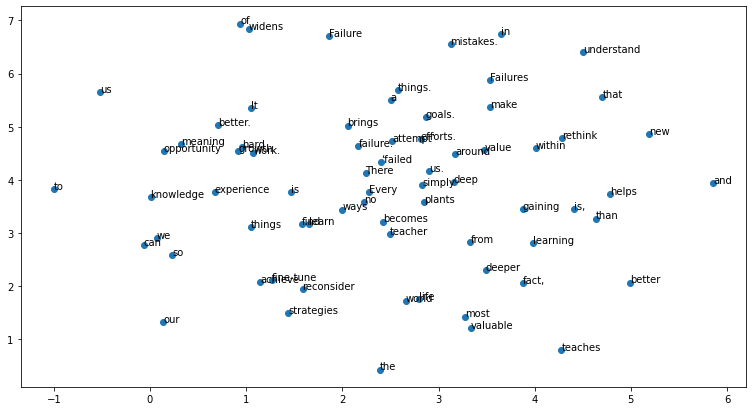

In [16]:
tsne = TSNE(2, verbose=1)
tsne_embeddings = tsne.fit_transform(embed)
# print(tsne_embeddings)
plt.figure(figsize=(13,7))
plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1])
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(tsne_embeddings[i,0],tsne_embeddings[i,1]))

In [28]:
# def PCA(embedding):
#   corr = np.corrcoef(embedding)
#   values,vectors = np.linalg.eig(corr)
#   args = (-values).argsort()
#   values = vectors[args]
#   vectors = vectors[:, args]
#   new_vectors=vectors[:,:2]
#   return np.multiply(embedding[:,:2], new_vectors)

In [30]:
# pca = PCA(embed)
# print(pca.shape)
# plt.figure(figsize=(13,7))
# plt.scatter(pca[:,0], pca[:,1])
# plt.title("Word Embedding Space",size=20)
# for i, word in enumerate(vocab):
#   plt.annotate(word,xy=(pca[i,0],pca[i,1]))